In [11]:
import pandas as pd
import jieba
#pip install jieba

### 数据源：http://www.sogou.com/labs/resource/ca.php ###

In [12]:
# val是处理过的数据，演示使用，使用原数据，需要处理半个小时以上
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [13]:
df_news.shape

(5000, 4)

###  分词：使用结吧分词器 ###

In [14]:
# 把内容转换成list结构
content = df_news.content.values.tolist()
print (content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [15]:
# 分词
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': # 换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jarod\AppData\Local\Temp\jieba.cache
Loading model cost 0.784 seconds.
Prefix dict has been built successfully.


In [16]:
# 看一下分词的结果
content_S[1000]

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

In [17]:
# 转换成df结构
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [18]:
# 清洁数据，使用停用词表stopwords.txt
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(20)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [19]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            # 清洁后的，放到line_clean
            line_clean.append(word)
            # 往下看
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [20]:
# 清洁后的数据
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [21]:
# 整理出来，出现过哪些词
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [22]:
# import numpy
# words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":'size'})
# words_count = words_count.reset_index().sort_values(by=["count"],ascending=False)
# words_count = df_all_words.groupby(by='all_words')['all_words'].agg({'count':'size'})
# words_count = words_count.reset_index().sort_values(by=['count'],ascending=False)
# 出现次数
words_count = df_all_words.groupby('all_words').agg(count=pd.NamedAgg(column='all_words', aggfunc='size')).reset_index().sort_values(
    by='count', ascending=False)
words_count.head()

,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


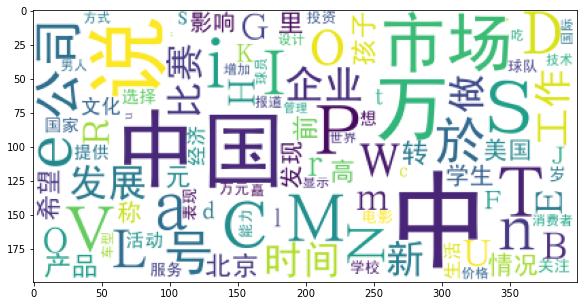

In [23]:
# pip install wordcloud
# https://github.com/amueller/word_cloud
# 画成文字云
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

###  TF-IDF ：提取关键词###

In [24]:
import jieba.analyse
index = 1000
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏
阿里巴巴  集团  首席  岗位  数据


###  LDA ：主题模型###

格式要求：list of list形式，分词好的的整个语料

In [27]:
# 安装gensim
# 需要先下载再安装https://pypi.org/project/botocore/#files
# 下载好botocore-1.17.59-py2.py3-none-any.whl文件
# pip install botocore-1.17.59-py2.py3-none-any.whl
# 然后再pip install gensim
from gensim import corpora, models, similarities
import gensim
# http://radimrehurek.com/gensim/

In [28]:
# 做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [29]:
# 使用ldamodel
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) 
#类似Kmeans自己指定K值

In [30]:
#一号分类结果
print (lda.print_topic(1, topn=5))

0.004*"万" + 0.004*"中" + 0.003*"Ｓ" + 0.003*"比基尼" + 0.003*"ｅ"


In [138]:
# 20个主题，打印一下
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.007*"女人" + 0.006*"男人" + 0.006*"Ｍ" + 0.004*"Ｓ" + 0.004*"说"
0.004*"中" + 0.004*"训练" + 0.003*"说" + 0.003*"学校" + 0.002*"研究生"
0.006*"戏" + 0.006*"导演" + 0.005*"该剧" + 0.004*"中" + 0.004*"演员"
0.007*"中" + 0.006*"说" + 0.004*"观众" + 0.002*"赛区" + 0.002*"岁"
0.004*"万" + 0.003*"号" + 0.003*"中" + 0.002*"Ｓ" + 0.002*"Ｒ"
0.014*"电影" + 0.009*"导演" + 0.007*"影片" + 0.006*"中国" + 0.005*"中"
0.006*"中" + 0.005*"比赛" + 0.004*"说" + 0.003*"撒" + 0.002*"时间"
0.006*"赛季" + 0.005*"中" + 0.003*"联赛" + 0.003*"中国" + 0.002*"航母"
0.005*"李小璐" + 0.004*"中" + 0.002*"贾乃亮" + 0.002*"Ｗ" + 0.002*"皮肤"
0.004*"万" + 0.003*"号" + 0.003*"Ｖ" + 0.003*"Ｔ" + 0.003*"刘涛"
0.021*"男人" + 0.008*"女人" + 0.007*"考生" + 0.004*"说" + 0.003*"中"
0.005*"中" + 0.005*"食物" + 0.004*"ｉ" + 0.004*"ａ" + 0.004*"吃"
0.006*"中" + 0.004*"电影" + 0.004*"说" + 0.002*"中国" + 0.002*"高考"
0.007*"中" + 0.006*"孩子" + 0.004*"说" + 0.003*"教育" + 0.003*"中国"
0.005*"中" + 0.005*"节目" + 0.004*"说" + 0.004*"表演" + 0.003*"岁"
0.007*"电视剧" + 0.004*"中" + 0.003*"说" + 0.003*"飞行" + 0.002*"飞机"
0.007*"中" + 0.006*"球队" + 0.00

In [31]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [32]:
# 查看一下不重复的内容
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [33]:
# 做映射
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [35]:
#x_train = x_train.flatten()
x_train[0][1]

'上海'

In [38]:
# 模拟构造向量
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
# 按照texts模式
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
# 添加一个组合模式
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [36]:
# 把list转换成string
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [37]:
print (len(words))

3750


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
# 按照wrod，最大特征数max_features，来构造向量
vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)


CountVectorizer(lowercase=False, max_features=4000)

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [42]:
# 测试集的处理
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [43]:
# 看一下结果
classifier.score(vec.transform(test_words), y_test)

0.8032

In [44]:
# 用Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [46]:
classifier.score(vectorizer.transform(test_words), y_test)

0.8136